<a href="https://colab.research.google.com/github/dcdlima/DL-with-python/blob/main/DL_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Primeiramente deve-se criar os tensores para realizar os cálculos necessários
All one or All zeros tensors

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2,1))
print(x)


tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


### Pode-se criar tensores de valores aleatórios

In [3]:
x = tf.random.normal(shape=(3,1),mean=0.,stddev=1.)
print(x)

tf.Tensor(
[[-0.21880732]
 [ 0.55931675]
 [ 0.3895309 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1),minval=0.,maxval=1.)
print(x)

tf.Tensor(
[[0.27701795]
 [0.12598658]
 [0.8968456 ]], shape=(3, 1), dtype=float32)


### Diferentemente dos arrays no Numpy não se pode atribuir valores aos tensores no TensorFlow

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

[[0. 1.]
 [1. 1.]]


In [6]:
### não é possível atribuir valores no tensor

x = tf.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [7]:
### Criando uma variável TensorFlow

v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.8133721 ],
       [-0.11179958],
       [-1.1853344 ]], dtype=float32)>


In [8]:
### atribuindo valores a uma variável TensorFlow

v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
### atribuindo valor a um subconjunto da variável TensorFlow
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [10]:
### utilizando assign_add()
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [11]:
### Operações com Tensores

a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print(e)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [12]:
### GradientTape API

input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [13]:
### GradientTape com entradas de tensor constante

input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [14]:
### GradientTapes aninhados para calcular gradientes de segunda ordem

time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.800000190734863>

## Implementando um classificador linear com Tensor Flow


In [15]:
### Criação de dados sintéticos
### gerando duas classes de pontos aleatórios em um plano 2D

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

In [16]:
### Acomodando as duas classes em um array (2000, 2)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [17]:
### gerando os targets correspondentes (0 e 1)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

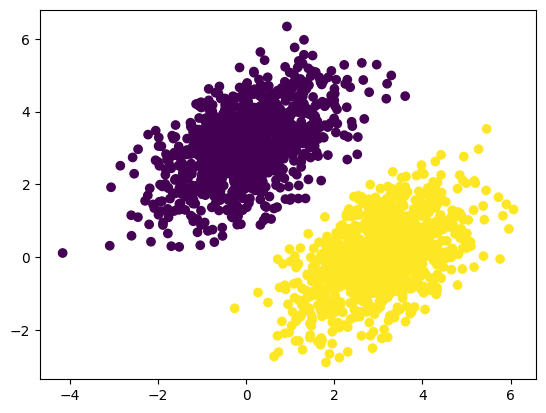

In [18]:
### Plotando os dados com matplotlib

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [19]:
### Criando as variáveis do classificador linear

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


In [20]:
### Função foward pass

def model(inputs):
    return tf.matmul(inputs, W) + b




In [21]:
### MSE função custo

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [22]:
### função etapa de treinamento

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

Loss at step 0: 5.2033
Loss at step 1: 0.8591
Loss at step 2: 0.2558
Loss at step 3: 0.1521
Loss at step 4: 0.1280
Loss at step 5: 0.1171
Loss at step 6: 0.1089
Loss at step 7: 0.1017
Loss at step 8: 0.0952
Loss at step 9: 0.0892
Loss at step 10: 0.0837
Loss at step 11: 0.0786
Loss at step 12: 0.0740
Loss at step 13: 0.0698
Loss at step 14: 0.0660
Loss at step 15: 0.0624
Loss at step 16: 0.0592
Loss at step 17: 0.0562
Loss at step 18: 0.0535
Loss at step 19: 0.0510
Loss at step 20: 0.0487
Loss at step 21: 0.0466
Loss at step 22: 0.0447
Loss at step 23: 0.0430
Loss at step 24: 0.0414
Loss at step 25: 0.0399
Loss at step 26: 0.0385
Loss at step 27: 0.0373
Loss at step 28: 0.0362
Loss at step 29: 0.0352
Loss at step 30: 0.0342
Loss at step 31: 0.0333
Loss at step 32: 0.0325
Loss at step 33: 0.0318
Loss at step 34: 0.0311
Loss at step 35: 0.0305
Loss at step 36: 0.0300
Loss at step 37: 0.0295
Loss at step 38: 0.0290
Loss at step 39: 0.0286


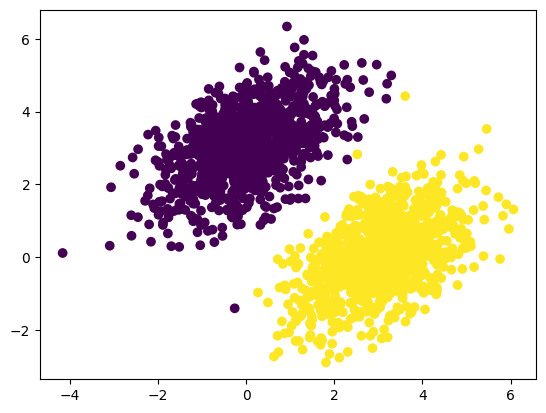

In [23]:
### loop to treinamento da batelada

for step in range(40):
  loss = training_step(inputs, targets)
  print(f'Loss at step {step}: {loss:.4f}')

predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:,0] > 0.5)
plt.show()

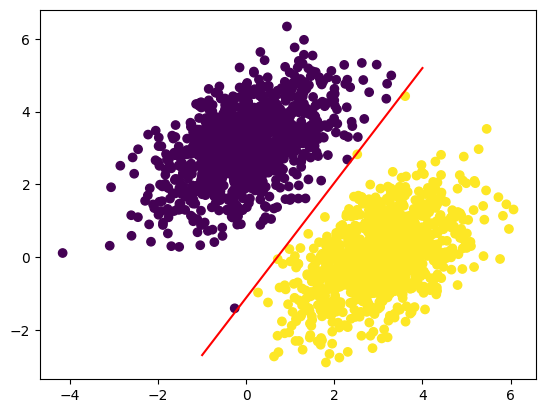

In [24]:
### desenhar uma linha para melhor visualização da classificação

x = np.linspace (-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y,"-r")
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:,0] > 0.5)
plt.show()

### Loading the IMDB Dataset

In [25]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [27]:
train_labels[0]

1

In [28]:
### restringimos os dados a 10000 por isso nenhum valor excederá a ele.

max([max(sequence) for sequence in train_data])

9999

In [29]:
###decodificando os reviews de volta para texto

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join ([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
### Multihot encoding para sequencia de intengers - aqui está ocorrendo a vetorização dos dados

import numpy as np
def vectorize_sequences (sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [31]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [32]:
### também é necessário vetorizar os rótulos

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


Após as etapas realizadas anteriormente os dados estão prontos para serem aplicados em uma rede neural.
Abaixo um exemplo de um modelo.


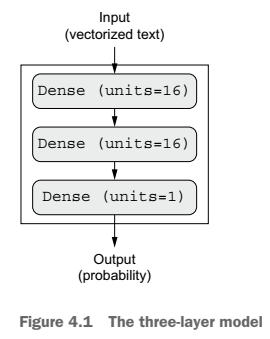

Extraído do livro Deep Learning With Python

In [33]:
### Definição do modelo

from tensorflow import keras
from tensorflow.keras import layers

### 2 camadas intermediárias de 16 unidades e uma camada de saída com 1 unidade

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [34]:
### loss function and optimizer
### como estamos trabalhando com um modelo cujo saída é uma probabilidade a escolha adequada é binary_crossentropy
### Optimizer será o rmsprop que é bom para praticamente todos os casos

### Compilando o modelo

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])



In [35]:
### Validando a abordagem

### Configurando o conjunto de validação

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [36]:
### treinando o modelo

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.5040 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.4985 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4960 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4998 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5059 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5045 - loss: 0.6931 - val_accuracy: 0.4948 - 

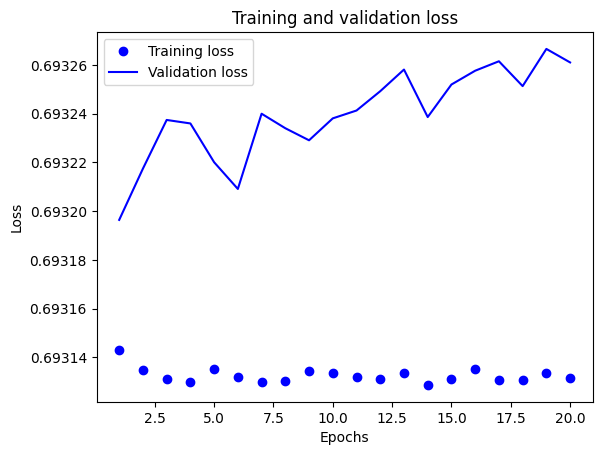

In [37]:
### Plotting the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

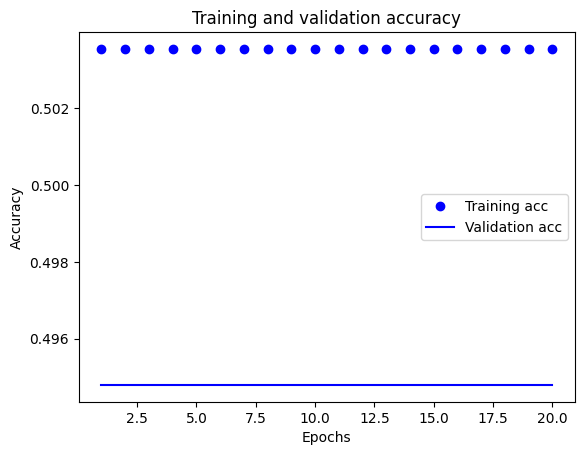

In [38]:
### plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [39]:
### Retreinando um modelo do zero

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4999 - loss: 0.6932
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4992 - loss: 0.6932
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4920 - loss: 0.6932
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4981 - loss: 0.6932
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5070 - loss: 0.6931


In [40]:
### o primeiro número representa the test loss e o segundo the test accuracy

results

[0.6931480765342712, 0.4999600052833557]

In [41]:
### usando um modelo treinando para fazer predições em novos dados

model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.5094952 ],
       [0.49960485],
       [0.49960485],
       ...,
       [0.49960485],
       [0.49960485],
       [0.49960485]], dtype=float32)

In [42]:
### Classificação Multi classes

### Carregando o conjunto de dados da Reuters

from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [43]:
###tamanho do conjunto de treinamento

len(train_data)

8982

In [44]:
### tamanho do conjunto de teste

len(test_data)

2246

In [45]:
### word index - os exemplos são uma lista de integers

train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [46]:
### Decodificando os inteiros pra texto

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])


In [47]:
train_labels[10]

3

In [48]:
### Encoding the input data
### vectorização

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [49]:
### encoding com o método one-hot

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [50]:
### fazendo o one-hot no Keras

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [51]:
### Construindo o modelo

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [52]:
### compilando o modelo
### para esse caso a melhor loss function é categorical crossentropy

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])


In [53]:
### configurando o conjunto de validação

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [54]:
### treinando o modelo

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.0865 - loss: 3.8185 - val_accuracy: 0.0470 - val_loss: 3.7979
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.2764 - loss: 3.7926 - val_accuracy: 0.2220 - val_loss: 3.7770
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2267 - loss: 3.7717 - val_accuracy: 0.3530 - val_loss: 3.7570
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3567 - loss: 3.7513 - val_accuracy: 0.2220 - val_loss: 3.7374
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.2728 - loss: 3.7324 - val_accuracy: 0.2230 - val_loss: 3.7178
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.2465 - loss: 3.7133 - val_accuracy: 0.3540 - val_loss: 3.6983
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.3350 - loss: 3.6936 - val_accuracy: 0.3540 - val_loss: 3.6790
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3306 - loss: 3.6739 - val_accuracy: 0.3540 - v

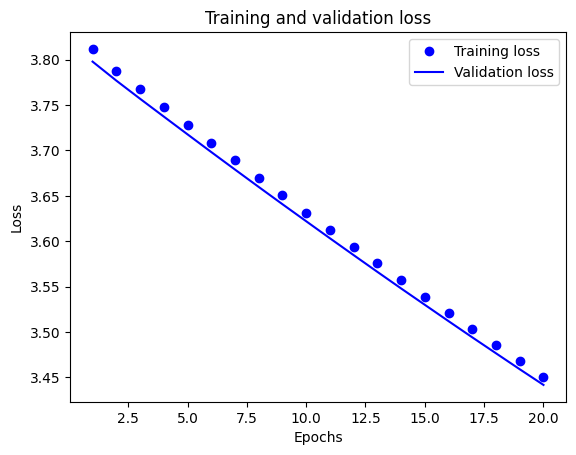

In [55]:
### plotting the training and validation loss

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) +1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

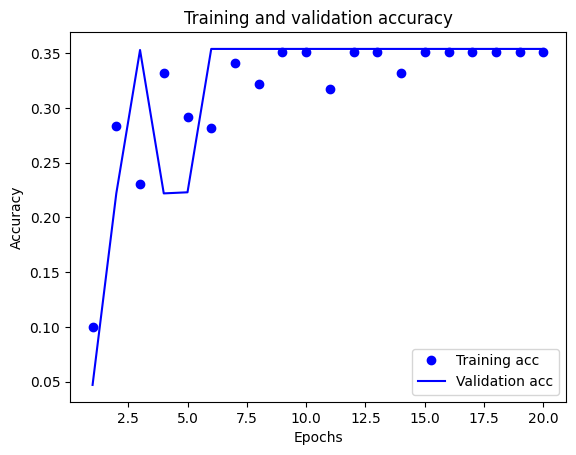

In [56]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [59]:
### retreinando o modelo do zero

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.1425 - loss: 3.8177 - val_accuracy: 0.3540 - val_loss: 3.7939
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3515 - loss: 3.7693 - val_accuracy: 0.3540 - val_loss: 3.6820
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.3524 - loss: 3.6427 - val_accuracy: 0.3540 - val_loss: 3.4997
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.3522 - loss: 3.4418 - val_accuracy: 0.3540 - val_loss: 3.2452
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3540 - loss: 3.1779 - val_accuracy: 0.3540 - val_loss: 2.9535
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.3482 - loss: 2.8934 - val_accuracy: 0.3540 - val_loss: 2.6764
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3535 - loss: 2.6288 - val_accuracy: 0.3540 - val_loss: 2.4908
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3507 - loss: 2.4912 - val_accuracy: 0.3540 - val_loss:

[2.4224143028259277, 0.36197686195373535]

In [58]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19456812110418523

In [60]:
### gerando predições em novos dados

predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [61]:
predictions[0].shape

(46,)

In [62]:
np.sum(predictions[0])

0.99999976

In [63]:
### A classe com maior probabilidade

np.argmax(predictions[0])

3

In [64]:
### uma forma diferente de manusear rótulos e loss function

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [65]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [72]:
### modelo com gargalho. Que merda acontece quando o tamanho da camada intermediária é muito menor que a saída

model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.2142 - loss: 3.8015 - val_accuracy: 0.3530 - val_loss: 3.7417
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3458 - loss: 3.7226 - val_accuracy: 0.3530 - val_loss: 3.6682
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3503 - loss: 3.6489 - val_accuracy: 0.3530 - val_loss: 3.5964
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3440 - loss: 3.5784 - val_accuracy: 0.3530 - val_loss: 3.5270
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3463 - loss: 3.5118 - val_accuracy: 0.3530 - val_loss: 3.4595
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3452 - loss: 3.4426 - val_accuracy: 0.3540 - val_loss: 3.3941
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3453 - loss: 3.3785 - val_accuracy: 0.3540 - val_loss: 3.3312
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3572 - loss: 3.3151 - val_accuracy: 0.3540 - v